# Práctica 01: Primera exploración a los datos

### Librerías 

In [1]:
import pandas as pd 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

### Lectura de datos

In [2]:
df = pd.read_csv('fuerocomunmunicipios.csv', encoding='latin')

In [3]:
df.head()

,state_code,mun_code,year,month,crime,category,type,subtype,count,population
0,1,1,2011,1,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,44.0,811483
1,1,1,2011,2,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,43.0,812551
2,1,1,2011,3,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,34.0,813619
3,1,1,2011,4,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,21.0,814686
4,1,1,2011,5,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,35.0,815754


Dimensión del dataframe

In [4]:
df.shape

(5740636, 10)

Información general del dataframe

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5740636 entries, 0 to 5740635
Data columns (total 10 columns):
state_code    int64
mun_code      int64
year          int64
month         int64
crime         object
category      object
type          object
subtype       object
count         float64
population    int64
dtypes: float64(1), int64(5), object(4)
memory usage: 438.0+ MB


Revisón de datos nulos

In [6]:
df.isnull().any().any()

True

Cantidad de filas con valores nulos

In [7]:
len(pd.isnull(df).any(1).nonzero()[0].tolist())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  """Entry point for launching an IPython kernel.


3414383

Columnas con valores nulos

In [8]:
df.columns[df.isnull().any()].tolist()

['count']

Estadísticos de resumen 

In [9]:
df.describe()

,state_code,mun_code,year,month,count,population
count,5.740636e+06,5.740636e+06,5.740636e+06,5.740636e+06,2.326253e+06,5.740636e+06
mean,1.899102e+01,9.452533e+01,2.012263e+03,6.004696e+00,2.308071e+00,5.235490e+04
std,7.608523e+00,1.188232e+02,9.405606e-01,3.479479e+00,1.984210e+01,1.450224e+05
min,1.000000e+00,1.000000e+00,2.011000e+03,1.000000e+00,0.000000e+00,9.000000e+01
25%,1.400000e+01,2.100000e+01,2.012000e+03,3.000000e+00,0.000000e+00,5.329000e+03
50%,2.000000e+01,5.100000e+01,2.012000e+03,6.000000e+00,0.000000e+00,1.491100e+04
75%,2.400000e+01,1.090000e+02,2.013000e+03,9.000000e+00,0.000000e+00,3.693200e+04
max,3.200000e+01,5.700000e+02,2.014000e+03,1.200000e+01,3.778000e+03,1.830454e+06


Distribución de los valores de la columna 'crime'

In [10]:
df.crime.value_counts(normalize=True)

ROBOS                               0.560623
LESIONES                            0.121216
HOMICIDIOS                          0.121210
DELITOS PATRIMONIALES               0.106052
OTROS DELITOS                       0.060600
DELITOS SEXUALES                    0.015150
PRIV. DE LA LIBERTAD (SECUESTRO)    0.015150
Name: crime, dtype: float64

Agrupamos los datos por la columna 'crime' y obtenemos la media, valores únicos y la suma de las demás columnas

In [11]:
df.groupby('crime').agg(['mean', 'nunique','sum']).stack()

state_code      mun_code  \
crime                                                                  
DELITOS PATRIMONIALES            mean     1.899145e+01  9.452464e+01   
                                 nunique  3.200000e+01  5.700000e+02   
                                 sum      1.156207e+07  5.754698e+07   
DELITOS SEXUALES                 mean     1.899145e+01  9.452464e+01   
                                 nunique  3.200000e+01  5.700000e+02   
                                 sum      1.651724e+06  8.220997e+06   
HOMICIDIOS                       mean     1.899113e+01  9.452580e+01   
                                 nunique  3.200000e+01  5.700000e+02   
                                 sum      1.321441e+07  6.577294e+07   
LESIONES                         mean     1.899087e+01  9.452520e+01   
                                 nunique  3.200000e+01  5.700000e+02   
                                 sum      1.321491e+07  6.577593e+07   
OTROS DELITOS                    mean     1.899156e+01  9.452679e+01   
                                 nunique  3.200000e+01  5.700000e+02   
                                 sum      6.606784e+06  3.288398e+07   
PRIV. DE LA LIBERTAD (SECUESTRO) mean     1.899156e+01  9.452679e+01   
                                 nunique  3.200000e+01  5.700000e+02   
                                 sum      1.651696e+06  8.220995e+06   
ROBOS                            mean     1.899087e+01  9.452520e+01   
                                 nunique  3.200000e+01  5.700000e+02   
                                 sum      6.111897e+07  3.042137e+08   

                                                  year         month  \
crime                                                                  
DELITOS PATRIMONIALES            mean     2.012263e+03  6.004553e+00   
                                 nunique  4.000000e+00  1.200000e+01   
                                 sum      1.225074e+09  3.655596e+06   
DELITOS SEXUALES                 mean     2.012263e+03  6.004553e+00   
                                 nunique  4.000000e+00  1.200000e+01   
                                 sum      1.750106e+08  5.222280e+05   
HOMICIDIOS                       mean     2.012263e+03  6.004699e+00   
                                 nunique  4.000000e+00  1.200000e+01   
                                 sum      1.400173e+09  4.178190e+06   
LESIONES                         mean     2.012263e+03  6.004725e+00   
                                 nunique  4.000000e+00  1.200000e+01   
                                 sum      1.400245e+09  4.178424e+06   
OTROS DELITOS                    mean     2.012263e+03  6.004657e+00   
                                 nunique  4.000000e+00  1.200000e+01   
                                 sum      7.000261e+08  2.088900e+06   
PRIV. DE LA LIBERTAD (SECUESTRO) mean     2.012263e+03  6.004657e+00   
                                 nunique  4.000000e+00  1.200000e+01   
                                 sum      1.750065e+08  5.222250e+05   
ROBOS                            mean     2.012263e+03  6.004725e+00   
                                 nunique  4.000000e+00  1.200000e+01   
                                 sum      6.476135e+09  1.932521e+07   

                                                 count    population  
crime                                                                 
DELITOS PATRIMONIALES            mean     2.830735e+00  5.235225e+04  
                                 nunique  3.780000e+02  4.639300e+04  
                                 sum      7.500230e+05  3.187226e+10  
DELITOS SEXUALES                 mean     1.056790e+00  5.235225e+04  
                                 nunique  5.000000e+01  4.639300e+04  
                                 sum      4.518200e+04  4.553180e+09  
HOMICIDIOS                       mean     3.821105e-01  5.235462e+04  
                                 nunique  8.900000e+01  4.640300e+04  
                    

Hacemos un muestreo aleatorio del 1% de los datos 

In [12]:
df_sample = df.sample(frac=0.01, random_state=1)
df_sample.head()

,state_code,mun_code,year,month,crime,category,type,subtype,count,population
5336858,30,205,2012,5,ROBOS,ROBO EN INSTITUCIONES BANCARIAS,SIN VIOLENCIA,OTROS,NaN,19429
4548928,27,7,2012,1,ROBOS,ROBO COMUN,SIN VIOLENCIA,DE VEHICULOS,0.0,30202
547626,8,10,2013,3,PRIV. DE LA LIBERTAD (SECUESTRO),PRIV. DE LA LIBERTAD (SECUESTRO),SECUESTRO,SECUESTRO,NaN,23941
2979568,20,235,2012,3,ROBOS,ROBO EN INSTITUCIONES BANCARIAS,SIN VIOLENCIA,SIN DATOS,NaN,3710
2884258,20,180,2013,11,ROBOS,ROBO EN INSTITUCIONES BANCARIAS,SIN VIOLENCIA,OTROS,NaN,2402


In [13]:
df_sample.shape

(57406, 10)

### Data Transform

Borramos los registros con valores nules en la columna 'count'

In [14]:
df_dropped = df.dropna(subset=['count'])
df_dropped.head()

,state_code,mun_code,year,month,crime,category,type,subtype,count,population
0,1,1,2011,1,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,44.0,811483
1,1,1,2011,2,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,43.0,812551
2,1,1,2011,3,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,34.0,813619
3,1,1,2011,4,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,21.0,814686
4,1,1,2011,5,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,35.0,815754


In [15]:
df_dropped.shape

(2326253, 10)

Hacemos una copia del dataframe original para no modificarlo

In [16]:
df_copy = df.copy()
df_copy.head()

,state_code,mun_code,year,month,crime,category,type,subtype,count,population
0,1,1,2011,1,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,44.0,811483
1,1,1,2011,2,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,43.0,812551
2,1,1,2011,3,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,34.0,813619
3,1,1,2011,4,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,21.0,814686
4,1,1,2011,5,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,35.0,815754


Llenamos los valores nulos de la columna count con la media

In [17]:
df_copy['count'].fillna(value=np.round(df['count'].mean(),decimals=0), inplace=True)

In [18]:
df_copy['count'].mean()

2.1248382583393197

In [19]:
df['count'].mean()

2.30807096218683

### Handling Categorical Data

Creamos un diccionario con la lista de meses

In [20]:
vals = ['ene','feb','mar','abr','may','jun','jul','ago','sep','oct','nov','dic']
keys = range(1,13)
month_map = dict(zip(keys,vals))
month_map

{1: 'ene',
 2: 'feb',
 3: 'mar',
 4: 'abr',
 5: 'may',
 6: 'jun',
 7: 'jul',
 8: 'ago',
 9: 'sep',
 10: 'oct',
 11: 'nov',
 12: 'dic'}

Creamos una nueva columna con la categoría numérica definida en en el diccionario

In [21]:
df_copy['month_name'] = df.month.map(month_map)
df_copy.head()

,state_code,mun_code,year,month,crime,category,type,subtype,count,population,month_name
0,1,1,2011,1,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,44.0,811483,ene
1,1,1,2011,2,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,43.0,812551,feb
2,1,1,2011,3,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,34.0,813619,mar
3,1,1,2011,4,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,21.0,814686,abr
4,1,1,2011,5,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,35.0,815754,may


 ### Normalizing Values

In [22]:
from sklearn import preprocessing

df_normalized = df.dropna().copy()
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df_normalized['population'].values.reshape(-1,1))
df_normalized['population_norm'] = np_scaled.reshape(-1,1)
df_normalized.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


,state_code,mun_code,year,month,crime,category,type,subtype,count,population,population_norm
0,1,1,2011,1,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,44.0,811483,0.443200
1,1,1,2011,2,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,43.0,812551,0.443783
2,1,1,2011,3,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,34.0,813619,0.444367
3,1,1,2011,4,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,21.0,814686,0.444950
4,1,1,2011,5,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,35.0,815754,0.445533


### Data Summarization

In [23]:
df['state_code'][df['month'] == 1].mean()

19.240224509512238

In [24]:
type(df['state_code'])

pandas.core.series.Series

In [25]:
df[df['month'] >= 6].groupby(['year','month']).count()

state_code  mun_code   crime  category    type  subtype  count  \
year month                                                                   
2011 6          119378    119378  119378    119378  119378   119378  47989   
     7          119378    119378  119378    119378  119378   119378  48152   
     8          119378    119378  119378    119378  119378   119378  48430   
     9          119378    119378  119378    119378  119378   119378  70378   
     10         119378    119378  119378    119378  119378   119378  72703   
     11         119378    119378  119378    119378  119378   119378  74103   
     12         119378    119378  119378    119378  119378   119378  66987   
2012 6          158334    158334  158334    158334  158334   158334  59672   
     7          158334    158334  158334    158334  158334   158334  59619   
     8          158334    158334  158334    158334  158334   158334  59612   
     9          158334    158334  158334    158334  158334   158334  58927   
     10         158334    158334  158334    158334  158334   158334  58274   
     11         158334    158334  158334    158334  158334   158334  58798   
     12         158334    158334  158334    158334  158334   158334  58642   
2013 6          162030    162030  162030    162030  162030   162030  58942   
     7          162030    162030  162030    162030  162030   162030  59644   
     8          157872    157872  157872    157872  157872   157872  58213   
     9          157872    157872  157872    157872  157872   157872  58961   
     10         147510    147510  147510    147510  147510   147510  58972   
     11         144540    144540  144540    144540  144540   144540  57091   
     12         100254    100254  100254    100254  100254   100254  55297   

            population  
year month              
2011 6          119378  
     7          119378  
     8          119378  
     9          119378  
     10         119378  
     11         119378  
     12         119378  
2012 6          158334  
     7          158334  
     8          158334  
     9          158334  
     10         158334  
     11         158334  
     12         158334  
2013 6          162030  
     7          162030  
     8          157872  
     9          157872  
     10         147510  
     11         144540  
     12         100254

In [26]:
df.groupby(['category', 'year'])[['crime', 'mun_code']].count()

crime  mun_code
category                         year                  
DELITOS PATRIMONIALES            2011  151872    151872
                                 2012  203140    203140
                                 2013  195426    195426
                                 2014   58366     58366
DELITOS SEXUALES (VIOLACION)     2011   21696     21696
                                 2012   29020     29020
                                 2013   27918     27918
                                 2014    8338      8338
HOMICIDIOS                       2011  173628    173628
                                 2012  232160    232160
                                 2013  223344    223344
                                 2014   66688     66688
LESIONES                         2011  173664    173664
                                 2012  232160    232160
                                 2013  223344    223344
                                 2014   66688     66688
OTROS DELITOS                    2011   86784     86784
                                 2012  116080    116080
                                 2013  111672    111672
                                 2014   33344     33344
PRIV. DE LA LIBERTAD (SECUESTRO) 2011   21696     21696
                                 2012   29020     29020
                                 2013   27918     27918
                                 2014    8336      8336
ROBO COMUN                       2011  303912    303912
                                 2012  406280    406280
                                 2013  390852    390852
                                 2014  116704    116704
ROBO DE GANADO (ABIGEATO)        2011   21708     21708
                                 2012   29020     29020
                                 2013   27918     27918
                                 2014    8336      8336
ROBO EN CARRETERAS               2011  217080    217080
                                 2012  290200    290200
                                 2013  279180    279180
                                 2014   83360     83360
ROBO EN INSTITUCIONES BANCARIAS  2011  260496    260496
                                 2012  348240    348240
                                 2013  335016    335016
                                 2014  100032    100032

In [27]:
df_sample.groupby(['category', 'year'])[['crime', 'population']].agg([np.sum, np.mean,np.count_nonzero])

population                            
                                             sum          mean count_nonzero
category                         year                                       
DELITOS PATRIMONIALES            2011   99093161  66909.629305          1481
                                 2012   90665548  44751.010859          2026
                                 2013   92501597  48455.524882          1909
                                 2014   33379766  58152.902439           574
DELITOS SEXUALES (VIOLACION)     2011   11933747  56291.259434           212
                                 2012   13144564  46121.277193           285
                                 2013   14207278  49502.710801           287
                                 2014    2132127  24507.206897            87
HOMICIDIOS                       2011  105193424  60490.755607          1739
                                 2012  117627699  49506.607323          2376
                                 2013  119203420  51358.647135          2321
                                 2014   41462264  61334.710059           676
LESIONES                         2011  112100154  64314.488812          1743
                                 2012  107434173  45736.131545          2349
                                 2013  116795779  53161.483386          2197
                                 2014   31104822  45945.084195           677
OTROS DELITOS                    2011   58456855  69016.357733           847
                                 2012   50118204  45314.831826          1106
                                 2013   49541036  44955.568058          1102
                                 2014   17362210  51065.323529           340
PRIV. DE LA LIBERTAD (SECUESTRO) 2011   19459189  84238.913420           231
                                 2012   17499882  59321.633898           295
                                 2013   10464583  38191.908759           274
                                 2014    3708745  49449.933333            75
ROBO COMUN                       2011  184299175  60346.815652          3054
                                 2012  194357318  47094.092077          4127
                                 2013  203328661  53606.290799          3793
                                 2014   52280108  46678.667857          1120
ROBO DE GANADO (ABIGEATO)        2011   11682449  60846.088542           192
                                 2012   16926908  57968.863014           292
                                 2013   14695755  54227.878229           271
                                 2014    4879920  50832.500000            96
ROBO EN CARRETERAS               2011  126969700  58673.613678          2164
                                 2012  153892916  52469.456529          2933
                                 2013  133303122  47304.159688          2818
                                 2014   41762997  51180.143382           816
ROBO EN INSTITUCIONES BANCARIAS  2011  158799259  60587.279283          2621
                                 2012  152171681  44158.932385          3446
                                 2013  182367844  53527.397711          3407
                                 2014   60872393  58139.821394          1047

### Data Visualization

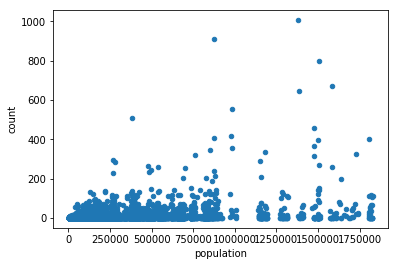

In [29]:
df_sample.plot(kind='scatter',x='population',y='count')